In [1]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_unit_test
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.__version__

In [3]:
# np.__version__

In [4]:
# !pip install pandas==2.1.4

In [5]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Create Train and test

In [6]:
df_l = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\london_weather_2014-2024.csv", parse_dates=['datetime'])
df_m = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\manila_weather_2014-2024.csv", parse_dates=['datetime'])
df_br = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\brisbane_weather_2014-2024.csv", parse_dates=['datetime'])
df_bu = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\bujanovac_weather_2014-2024.csv", parse_dates=['datetime'])
# df_new = pd.read_csv("wetransfer_thesis-data-and-notebook_2024-06-27_1654/bujanovac_weather_2014-2024.csv", parse_dates=['datetime'])

In [7]:
df_l_train = df_l[df_l['datetime']< pd.to_datetime('2023-01-01')]
df_m_train = df_m[df_m['datetime']< pd.to_datetime('2023-01-01')]
df_br_train = df_br[df_br['datetime']< pd.to_datetime('2023-01-01')]
df_bu_train = df_bu[df_bu['datetime']< pd.to_datetime('2023-01-01')]

In [8]:
df_l_test = df_l[df_l['datetime']> pd.to_datetime('2023-01-01')]
df_m_test = df_m[df_m['datetime']>pd.to_datetime('2023-01-01')]
df_br_test = df_br[df_br['datetime']> pd.to_datetime('2023-01-01')]
df_bu_test = df_bu[df_bu['datetime']> pd.to_datetime('2023-01-01')]

In [9]:
df_bu_test.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
3288,3288,"Bujanovac, Serbia",2023-01-02,5.7,-0.8,1.0,5.7,-0.8,1.0,0.6,...,4.4,4,10.0,2023-01-02T07:02:41,2023-01-02T16:11:11,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LWSK,13493099999,13586099999,BKPR,13588099999,..."
3289,3289,"Bujanovac, Serbia",2023-01-03,10.4,-1.5,2.2,10.4,-1.5,2.0,1.0,...,4.8,4,10.0,2023-01-03T07:02:43,2023-01-03T16:12:05,0.38,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LWSK,13493099999,13586099999,BKPR,13588099999,..."
3290,3290,"Bujanovac, Serbia",2023-01-04,10.1,-0.9,4.0,10.1,-0.9,3.5,2.7,...,3.6,2,10.0,2023-01-04T07:02:43,2023-01-04T16:13:01,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LWSK,13493099999,13586099999,BKPR,13588099999,..."
3291,3291,"Bujanovac, Serbia",2023-01-05,10.6,0.9,5.7,10.6,-1.3,5.4,3.5,...,5.1,4,10.0,2023-01-05T07:02:41,2023-01-05T16:13:58,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LWSK,13493099999,13586099999,BKPR,13590099999,..."
3292,3292,"Bujanovac, Serbia",2023-01-06,12.2,-1.1,3.7,12.2,-1.8,3.3,0.6,...,5.2,3,10.0,2023-01-06T07:02:36,2023-01-06T16:14:56,0.48,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"LWSK,13493099999,13586099999,BKPR,13588099999,..."


# Train > X and y

In [10]:
X_train  = pd.DataFrame(index=range(4), columns=range(1))

In [11]:
X_train = X_train.rename({0:'temp'}, axis=1)

In [12]:
X_train.iloc[0, 0] = pd.Series(df_l_train['temp'])
X_train.iloc[1, 0] = pd.Series(df_m_train['temp'])
X_train.iloc[2, 0] = pd.Series(df_br_train['temp'])
X_train.iloc[3, 0] = pd.Series(df_bu_train['temp'])

In [13]:
# 1: North:  London, Bujanovac 
# and 0: South: Brisbane, Manila
y_train = pd.Series([1,0,0,1])

In [14]:
y_train

0    1
1    0
2    0
3    1
dtype: int64

# Test > X and y

In [15]:
X_test  = pd.DataFrame(index=range(4), columns=range(1))

In [16]:
X_test = X_test.rename({0:'temp'}, axis=1)

In [17]:
X_test.iloc[0, 0] = pd.Series(df_l_test['temp'])
X_test.iloc[1, 0] = pd.Series(df_m_test['temp'])
X_test.iloc[2, 0] = pd.Series(df_br_test['temp'])
X_test.iloc[3, 0] = pd.Series(df_bu_test['temp'])

In [18]:
X_test.iloc[0,0]

3288     6.4
3289     9.0
3290    12.7
3291    11.7
3292    10.2
        ... 
3788    14.2
3789    16.4
3790    15.8
3791    16.6
3792    15.1
Name: temp, Length: 505, dtype: float64

In [19]:
# 1: London, Bujanovac and 0: Brisbane, Manila
y_test = pd.Series([1,0,0,1])

In [20]:
y_test

0    1
1    0
2    0
3    1
dtype: int64

# Out of sample prediction

In [21]:
X_validation = pd.DataFrame(index=range(2), columns=range(1))


In [22]:
X_validation

,0
0,NaN
1,NaN


In [23]:
# X_validation.iloc[0, 0] = pd.Series(df_new_one['temp'])
# X_validation.iloc[0, 0] = pd.Series(df_new_two['temp'])

# TS Classification

In [24]:
X_train

,temp
0,0 9.1 1 9.1 2 9.0 3 ...
1,0 26.6 1 27.0 2 26.7 3 ...
2,0 25.1 1 25.3 2 27.5 3 ...
3,0 4.3 1 3.7 2 3.3 3 2....


In [25]:
y_train

0    1
1    0
2    0
3    1
dtype: int64

In [26]:
clf = TimeSeriesForestClassifier(n_estimators=200, random_state=1)
clf.fit(X_train, y_train)

TimeSeriesForestClassifier(random_state=1)

In [27]:
y_train

0    1
1    0
2    0
3    1
dtype: int64

In [28]:
X_train

,temp
0,0 9.1 1 9.1 2 9.0 3 ...
1,0 26.6 1 27.0 2 26.7 3 ...
2,0 25.1 1 25.3 2 27.5 3 ...
3,0 4.3 1 3.7 2 3.3 3 2....


In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 1], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [32]:
print(f"Accuracy for the TimeSeries Classifier baseline model: {accuracy:.4f}")
print(f"Precision for the TimeSeries Classifier baseline model: {precision:.4f}")
print(f"Recall for the TimeSeries Classifier baseline model: {recall:.4f}")
print(f"F1 Score for the TimeSeries Classifier baseline model: {f1:.4f}")
print("\nClassification Report for baseline model:\n", classification_report(y_test, y_pred))

Accuracy for the TimeSeries Classifier baseline model: 1.0000
Precision for the TimeSeries Classifier baseline model: 1.0000
Recall for the TimeSeries Classifier baseline model: 1.0000
F1 Score for the TimeSeries Classifier baseline model: 1.0000

Classification Report for baseline model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [33]:
cm = confusion_matrix(y_test, y_pred)

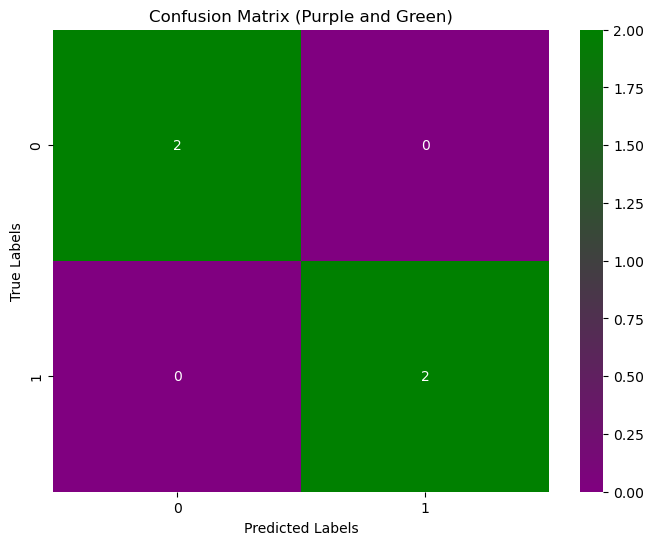

In [34]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('purple_green', ['purple', 'green'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Purple and Green)')
plt.show()

## Test on two new locations (without training the algorithm first)

In [35]:
# y_pred_validation = clf.predict(X_validation)

In [36]:
df_la = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\lagos_weather_2014-2024.csv", parse_dates=['datetime'])
df_li = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\lima_weather_2014-2024.csv", parse_dates=['datetime'])


In [37]:
X_test_new =  pd.DataFrame(index=range(2), columns=range(1))
X_test_new.iloc[0, 0] = pd.Series(df_la['temp'])
X_test_new.iloc[1, 0] = pd.Series(df_li['temp'])



In [38]:
y_pred_new_locations = clf.predict(X_test_new)

In [39]:
y_pred_new_locations 

array([0, 0], dtype=int64)

In [40]:
# both new locations are predicted to be class 0 = southern hemisphere